## Gathering data:

### Create the three datasets using different source

* csv file directly
* read from online files with response api
* read data with tweet API

In [1]:
import re, json, requests,  tweepy
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
pd.set_option('display.max_columns', 999)
import warnings
warnings.simplefilter(action='ignore')

In [2]:
# directly read the csv file from download the link, then upload to workspace.  
df1 = pd.read_csv("twitter-archive-enhanced.csv")
df1.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
# read file directly from URL and save the response to tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open("image_predictions.tsv", mode = "wb") as file:
    file.write(response.content)
    
df2 = pd.read_csv('image_predictions.tsv', sep = '\t')
df2.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [4]:
## Use following code to download the each user file to tweet_json.txt with tweet API. 
## I have hide all my personal tweet credentials in here. 

"""
from timeit import default_timer as timer
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df1.tweet_id.values
print(len(tweet_ids))

count = 0
fails_dict = {}
start = timer()

with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
""";

In [5]:
# from above txt to save the data into another dataframe
dicts = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        try:
            data = json.loads(line)
            dicts.append({'tweet_id': data['id'],
                          'retweet_count': data['retweet_count'],
                          'favorite_count': data['favorite_count'],
                          'created_at':data['created_at'],
                          'text':data['full_text'],
                          'text_range':data['display_text_range']
                         })
        except:
            print('error in parsing this line', line)
df3 = pd.DataFrame(dicts, columns = ["tweet_id", "retweet_count", "favorite_count", 'created_at', 'text', 'text_range'])
df3.head()

,tweet_id,retweet_count,favorite_count,created_at,text,text_range
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]"
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....,"[0, 138]"
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]"
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...,"[0, 79]"
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...,"[0, 138]"


In [6]:
len(df1[df1['tweet_id']==892177421306343426].text.values[0])

162

In [7]:
df1[df1['tweet_id']==892177421306343426].text.values[0]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

## Assessing Data:

#### Visual and programatic assessment of data 

**archive data:**

- 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' columns seem to miss a lot of values
- Some rating numerators and denominators are 0
- Some names are missing with value None
- Only limited dog breed info is included, few doggo, floofer, pupper, puppo breeds
- Some expanded URLs have multiple or 0 urls

**prediction data:**

- There is much less data in prediction than archive tweet datasets.  
- Some prediction are not dogs, but actually are dogs images. 
- Prediction datasets say imag_num is more than 1, but in the link of image url, there is only 1 url exist. 

**tweet_json**

- Two tweet id is not in tweet, these ids are  888202515573088257 and 771004394259247104


In [8]:
## first check the duplicate and null value of 1st dataframe for tweeter users.

df1[df1.duplicated()]  #show no data are duplicated as bellow

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [9]:
df1.tweet_id.nunique(), df1.shape # this shows that no tweet id is duplicated in datasets.

(2356, (2356, 17))

In [10]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

As we can see above that 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' have lots of missing data, which we will drop them later. Also timestamp should be in appropriate datetime format. 

In [11]:
df1['tweet_id'].nunique(), df2['tweet_id'].nunique(), df3['tweet_id'].nunique(), df1.shape, df2.shape, df3.shape

(2356, 2075, 2354, (2356, 17), (2075, 12), (2354, 6))

In [12]:
df1[df1.retweeted_status_id.isnull() == False] # these are retweets, which according to udacity we should remove retweets. 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [13]:
sum(pd.Series(df1['tweet_id'].unique()).isin(pd.Series(df3['tweet_id'].unique())))
# two users not in image prediction datasets

2354

In [14]:
df1[~df1['tweet_id'].isin(df2['tweet_id'].unique())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN,NaN,NaN,https://twitter.com/kaijohnson_19/status/88396...,13,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None


In [15]:
for i in ['name', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']:
    print('******* for column***', i )
    print(df1[i].value_counts())

******* for column*** name
None           745
a               55
Charlie         12
Oliver          11
Lucy            11
              ... 
Einstein         1
Christoper       1
Orion            1
Shakespeare      1
Caryl            1
Name: name, Length: 957, dtype: int64
******* for column*** rating_numerator
12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64
******* for column*** rating_denominator
10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90       

Total dog types are only 4 types in this data. doggo(97), pupper (257), floofer(10), puppo(30). which is much less than the whole datasets

In [16]:
df1[df1['rating_numerator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [17]:
df1[df1['rating_numerator']==80]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [18]:
df1[df1['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [19]:
df1.iloc[313]['source'] # this column has strange rating for numerator and denominator

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [20]:
# In above, I see that "name" is missing in lots of data 745 value is None.
## rating_numerator and rating_denominator has value of 0
## doggo has 97 non-null values, floofer has 10 non-null values, 
## pupper has 257 non-null values, puppo has 30 no null values. 

In [21]:
df1['text'].value_counts()

*lets out a tiny whimper and then collapses* ...12/10 https://t.co/BNdVZEHRow                                                                                          1
This is actually a pupper and I'd pet it so well. 12/10\nhttps://t.co/RNqS7C4Y4N                                                                                       1
RT @dog_rates: Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0Dv…                           1
This is Ralphy. His dreams were just shattered. Poor pupper. 13/10 it'll be ok Ralphy https://t.co/P0kSN6rT6H                                                          1
RT @KennyFromDaBlok: 14/10 h*ckin good hats. will wear daily @dog_rates https://t.co/rHLoU5gS30                                                                        1
                                                                                                                                                           

In [22]:
df1['source'].value_counts() # the source column include html tag, which can be simplified as "Twitter for iPhone",  "Twitter Web Client"

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [23]:
df1['source'].map(lambda x: x.count('http')).value_counts() # check if source has more than one url

1    2356
Name: source, dtype: int64

In [24]:
df1['expanded_urls'].map(lambda x: str(x).count('https')).value_counts().head() # check if expanded_url has url

1    1656
2     365
4     138
3     120
0      61
Name: expanded_urls, dtype: int64

we can see expanded_urls can have 0~4 possible urls.

In [25]:
df1['expanded_urls'].map(lambda x: str(x).count('https')).sample(5)

1236    1
1030    3
615     1
1509    2
399     6
Name: expanded_urls, dtype: int64

In [26]:
df1['expanded_urls'][4] # expanded_url has more than one url

'https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1'

In [27]:
df1['expanded_urls'][505]

'https://twitter.com/dog_rates/status/812781120811126785/photo/1,https://twitter.com/dog_rates/status/812781120811126785/photo/1,https://twitter.com/dog_rates/status/812781120811126785/photo/1'

In [28]:
for i in df1.iloc[505, ]:
    print(i)

812781120811126785
nan
nan
2016-12-24 22:04:54 +0000
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
This is Swagger. He's the Cleveland Browns ambassador. Hype as h*ck after that first win today. 10/10 https://t.co/lXFM1l22bG
nan
nan
nan
https://twitter.com/dog_rates/status/812781120811126785/photo/1,https://twitter.com/dog_rates/status/812781120811126785/photo/1,https://twitter.com/dog_rates/status/812781120811126785/photo/1
10
10
Swagger
None
None
None
None


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
df2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1067,715733265223708672,https://pbs.twimg.com/media/Ce7LlUeUUAEQkQl.jpg,1,Dandie_Dinmont,0.740229,True,miniature_poodle,0.081915,True,toy_poodle,0.063748,True
545,677314812125323265,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,2,Blenheim_spaniel,0.924127,True,Japanese_spaniel,0.054790,True,Chihuahua,0.008204,True
1000,708711088997666817,https://pbs.twimg.com/media/CdXY-GHWoAALing.jpg,2,tennis_ball,0.912961,False,German_short-haired_pointer,0.052695,True,Labrador_retriever,0.018477,True
999,708479650088034305,https://pbs.twimg.com/media/CdUGcLMWAAI42q0.jpg,1,Shih-Tzu,0.218479,True,Lhasa,0.201966,True,Norfolk_terrier,0.165225,True
1006,709158332880297985,https://pbs.twimg.com/media/CddvvSwWoAUObQw.jpg,1,Siberian_husky,0.212957,True,Eskimo_dog,0.178887,True,Labrador_retriever,0.174218,True


In [31]:
df2.p1.value_counts().head(10)

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
cocker_spaniel         30
Name: p1, dtype: int64

In [32]:
df2.p2.value_counts().head(10)

Labrador_retriever          104
golden_retriever             92
Cardigan                     73
Chihuahua                    44
Pomeranian                   42
Chesapeake_Bay_retriever     41
French_bulldog               41
toy_poodle                   37
cocker_spaniel               34
miniature_poodle             33
Name: p2, dtype: int64

In [33]:
df2.p3.value_counts().head(10)

Labrador_retriever           79
Chihuahua                    58
golden_retriever             48
Eskimo_dog                   38
kelpie                       35
kuvasz                       34
Staffordshire_bullterrier    32
chow                         32
cocker_spaniel               31
beagle                       31
Name: p3, dtype: int64

In [34]:
df2.img_num.value_counts() ## some prediction data has more than 1 image.

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [35]:
df2[df2.img_num ==4].head() # this file has img_num=4, but there is only 1 image in url

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
779,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian,0.943331,True,Shetland_sheepdog,0.023675,True,chow,0.007165,True
1024,710588934686908417,https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg,4,Pembroke,0.982004,True,Cardigan,0.008943,True,malamute,0.007550,True
1161,734787690684657664,https://pbs.twimg.com/media/CjJ9gQ1WgAAXQtJ.jpg,4,golden_retriever,0.883991,True,chow,0.023542,True,Labrador_retriever,0.016056,True
1286,750868782890057730,https://pbs.twimg.com/media/CmufLLsXYAAsU0r.jpg,4,toy_poodle,0.912648,True,miniature_poodle,0.035059,True,seat_belt,0.026376,False


In [36]:
df2[df2.img_num ==3].head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
479,675349384339542016,https://pbs.twimg.com/media/CV9SrABU4AQI46z.jpg,3,borzoi,0.866367,True,Saluki,0.122079,True,Irish_wolfhound,0.004020,True
602,679828447187857408,https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg,3,Chihuahua,0.346545,True,dalmatian,0.166246,True,toy_terrier,0.117502,True
609,680085611152338944,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,3,pillow,0.778113,False,apron,0.095023,False,wallet,0.049326,False
627,680836378243002368,https://pbs.twimg.com/media/CXLREjOW8AElfk6.jpg,3,Pembroke,0.427781,True,Shetland_sheepdog,0.160669,True,Pomeranian,0.111250,True


In [37]:
df2.p1_dog.sum()/df2.shape[0]

0.7383132530120482

In [38]:
df2.p2_dog.sum()/df2.shape[0]

0.7484337349397591

In [39]:
df2.p3_dog.sum()/df2.shape[0] #nearly 30% of images are not predicted as dogs. 

0.7224096385542169

In [40]:
df2[df2['p1_dog']==False].head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False


In [41]:
df1.tweet_id.nunique(), df1.shape[0], df3.tweet_id.nunique(), df3.shape[0]

(2356, 2356, 2354, 2354)

In [42]:
df3.head()

,tweet_id,retweet_count,favorite_count,created_at,text,text_range
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]"
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....,"[0, 138]"
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]"
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...,"[0, 79]"
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...,"[0, 138]"


In [43]:
df3[df3['tweet_id']==891815181378084864].text.values

array(['This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB'],
      dtype=object)

In [44]:
df1[df1['tweet_id']==891815181378084864]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [45]:
df1[df1['tweet_id']==891815181378084864].text.values

array(['This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB'],
      dtype=object)

In [46]:
df1[df1['tweet_id']==891815181378084864].expanded_urls.values

array(['https://twitter.com/dog_rates/status/891815181378084864/photo/1'],
      dtype=object)

In [47]:
df3[df3['tweet_id']==891815181378084864]

,tweet_id,retweet_count,favorite_count,created_at,text,text_range
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]"


In [48]:
df3.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [49]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
created_at        2354 non-null object
text              2354 non-null object
text_range        2354 non-null object
dtypes: int64(3), object(3)
memory usage: 110.5+ KB


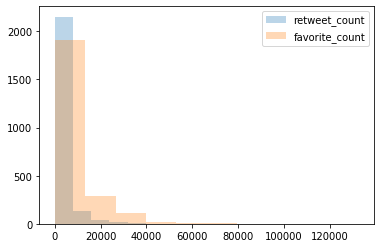

In [50]:
plt.hist(df3['retweet_count'], alpha = 0.3, label = 'retweet_count')
plt.hist(df3['favorite_count'], alpha = 0.3, label = 'favorite_count')
plt.legend(); # check the favoriate retweet count.

#### Assessment Summary

Data quality issues:

* There is much less data in prediction than archive tweet datasets. (2075 prediction /2356 tweet archive data)
* 'in_reply_to_status_id', 'in_reply_to_user_id', columns seem to miss a lot of values. Only 78 is not null
* 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' columns seem to miss a lot of values. Only 181 is not null. These are retweets, which should be removed.  
* Some rating numerators and denominators are 0. Some rating scale is very different from others. 
* Some names are missing with value "None"
* Some expanded URLs have multiple or 0 urls
* Several columns data should be in timestamp format instead of string.
* The source field in archive data include html tags, which could be much more simplified.
* Two tweet id in tweet data is not in tweet_txt.json, these ids are  888202515573088257 and 771004394259247104
* Some prediction are not dogs, but actually are dogs images. 
* Prediction datasets say imag_num is more than 1, but in the link of image url, there is only 1 url exist. 
* Total dog stage are only 4 types in tweet data. doggo(97), pupper (257), floofer(10), puppo(30). which is much less than the whole datasets of size 2356. 

Data tidiness issues:

* In tweet_data, too many columns for the dog stages, as in doggo, pupper, floofer and puppo, which can be combined in one column "stage".  
* All these files should be joined together to provide the final dataset.


## Cleaning data

In [51]:
## copy archive dataframe to a new dataframe
cleandf = df1.copy()

#### Define

Archive dataframe contains retweets, thus we need to remove them

In [52]:
# CODE: keep retweet that is null, which means that keep original tweet data
cleandf = cleandf[cleandf.retweeted_status_id.isnull()]

In [53]:
# TEST: make sure retweet is null in all the cleandf, which should equals the shape[0] of dataframe
np.sum(cleandf.retweeted_status_id.isnull()) ==  cleandf.shape[0]

True

#### Define
Drop columns which have too many null values.

In [54]:
# CODE: Directly drop 5 columns inplace 
cleandf.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 
                        'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

In [55]:
# TEST: check the head of dataframe
cleandf.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Define
change the timestamp to correct datatype

In [56]:
# CODE: directly change type
cleandf['timestamp'] = pd.to_datetime(cleandf['timestamp'])

In [57]:
# TEST:
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 220.9+ KB


#### Define
remove tweetid, which do not have the corresponding image prediction

In [58]:
# CODE: Inner join prediciton and archive tweet together.
print(cleandf.shape, df2.shape, 'final dataframe size should be ', sum(df2.tweet_id.isin(cleandf.tweet_id)))

(2175, 12) (2075, 12) final dataframe size should be  1994


In [59]:
# TEST: if new merged dataframe has the same shape as discussed above.
cleandf = pd.merge(cleandf, df2, left_on ='tweet_id', right_on='tweet_id', how ='inner')
cleandf.shape, cleandf.tweet_id.nunique()

((1994, 23), 1994)

In [60]:
cleandf.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [61]:
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns, UTC]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994

#### Define
clean the source column, where html tag is included

In [62]:
# CODE: remove html tag <a>, <\a> and anything between, change to category type
cleandf.source = cleandf.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')
cleandf.source = cleandf.source.astype('category')

In [63]:
# TEST:
cleandf.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [64]:
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns, UTC]
source                1994 non-null category
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    19

#### Define

The text box in cleandf has text of various length, use tweet_txt.json with text_range to set correct range, remove url in the end

In [65]:
for i in cleandf['text'][0:3]:
    print(i)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB


In [66]:
# CODE: merge cleandf with df3 with tweetid, then change the corresponding text_range

cleandf = pd.merge(cleandf, df3[['tweet_id', 'text_range', 'retweet_count', 'favorite_count']], on='tweet_id')

In [67]:
def clean_text(x):
    text = x['text']
    li = x['text_range']
    return text[li[0]:li[1]]
cleandf['text'] = cleandf[['text', 'text_range']].apply(lambda x: clean_text(x), axis = 1)
cleandf.drop(['text_range'], axis = 1, inplace = True)

In [68]:
# TEST: print code to see if it is removed within correct text_range, 
for i in cleandf['text'][0:3]:
    print(i)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10


#### Define:

Since 4 dog stages are in 4 different columns, we could map them into a single column called 'stage'. Then map them into category type

In [69]:
# CODE: merge 4 columns to 1 column

cleandf['stage'] = cleandf[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)
cleandf.stage = cleandf.stage.astype('category')
cleandf.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [70]:
# TEST: now column stage has 5 different types of value.
cleandf['stage'].value_counts()

None       1688
pupper      212
doggo        63
puppo        23
floofer       8
Name: stage, dtype: int64

In [71]:
cleandf.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,None


#### Define:

Since there are prediction probability included for top3 breeds, we only need 1 column keep highest probability. If highest probability is dog, put breed in column, if not, then just use None. 

In [72]:
# CODE: only keep highest probability. If highest probability is dog, put breed in column, if not, then just use None
def merge_breed(x): 
    if x['p1_dog'] == False:
        return None
    else:
        return x['p1']
    
cleandf['breed'] = cleandf.apply(lambda x: merge_breed(x), axis = 1)
cleandf.drop(['p1','p1_conf', 'p1_dog', 'p2', 'p2_conf','p2_dog','p3', 'p3_conf','p3_dog'], axis = 1, inplace = True)

In [73]:
# TEST:
cleandf['breed'].value_counts()

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
                     ... 
EntleBucher             1
groenendael             1
clumber                 1
Scotch_terrier          1
Japanese_spaniel        1
Name: breed, Length: 111, dtype: int64

In [74]:
cleandf.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,retweet_count,favorite_count,stage,breed
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,8853,39467,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,6514,33819,None,Chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,4328,25461,None,Chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,8964,42908,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,9774,41048,None,basset


In [75]:
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns, UTC]
source                1994 non-null category
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
stage                 1994 non-null category
breed                 1477 non-null object
dtypes: category(2), datetime64[ns, UTC](1), int64(6), object(5)
memory usage: 206.7+ KB


## Storing data

In [82]:
cleandf.to_csv('tweet_archive_master.csv', index = False)

## Analyzing the datasets

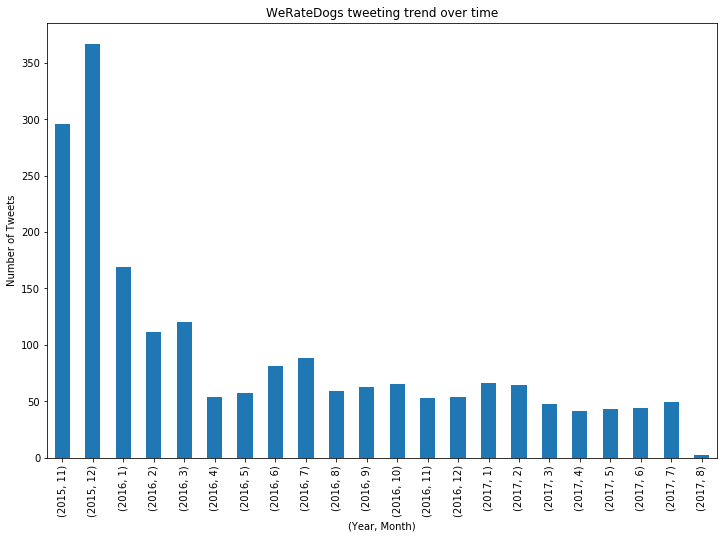

In [77]:
## let's quickly plot number of tweets from weratedog changes overtime. 
df = cleandf.copy()
gp = df.tweet_id.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).count()
plt.figure(figsize = (12, 8))
ax = gp.plot.bar('line', title='WeRateDogs tweeting trend over time');
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets");

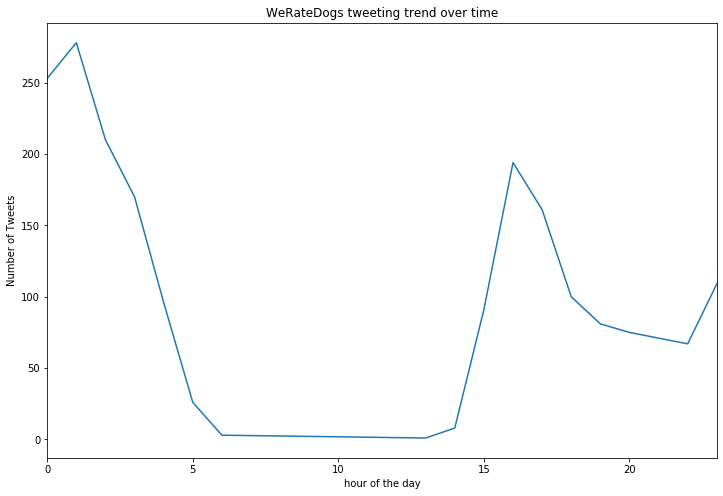

In [78]:
## What time are people most actively tweet, morning, noon, night? 
gp = df.tweet_id.groupby(df["timestamp"].dt.hour).count()
plt.figure(figsize = (12, 8))
ax = gp.plot('line', title='WeRateDogs tweeting trend over time');
ax.set_xlabel("hour of the day")
ax.set_ylabel("Number of Tweets");

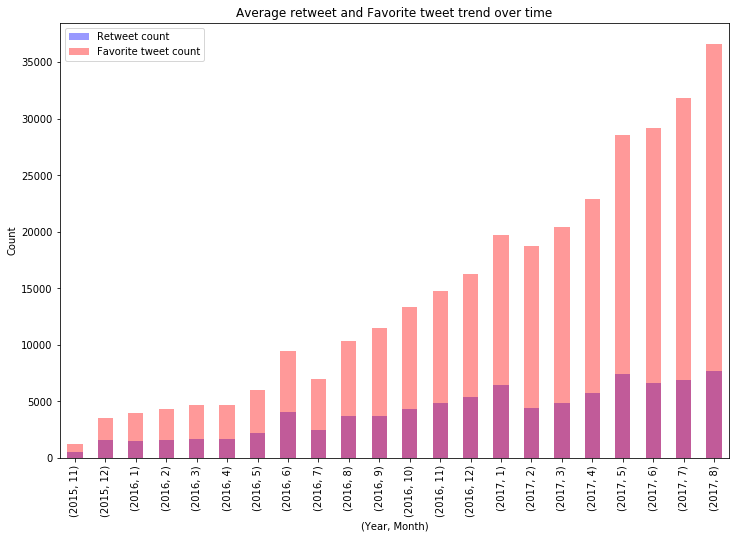

In [79]:
# How is the trend of retweet and favoriate tweet count changes over time. 
# Since we know that number of tweets increase over time, it's better to use average retweet/favorite counts changes overtime. 
plt.figure(figsize = (12, 8))
df.retweet_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('bar', color= 'blue', alpha = 0.4 )
df.favorite_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('bar', color = 'red', alpha = 0.4 )
plt.title('Average retweet and Favorite tweet trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweet count', 'Favorite tweet count'));

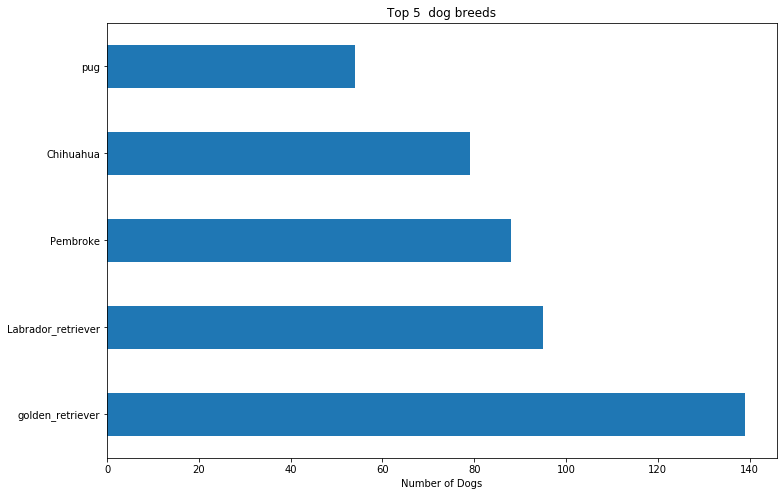

In [80]:
df.breed.value_counts()[0:5].plot('barh', figsize=(12,8), title='Top 5  dog breeds').set_xlabel("Number of Dogs");